In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense,Embedding,LSTM,Bidirectional
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [14]:
news_train=fetch_20newsgroups(subset='train')
news_test=fetch_20newsgroups(subset='test')

In [15]:
len(news_train)

print(len(news_train.data))

print(news_train.target_names)
label_names=news_train.target_names

11314
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [16]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(news_train.data)
tokenizer.fit_on_texts(news_test.data)

X_train=tokenizer.texts_to_sequences(news_train.data)
X_train=pad_sequences(X_train,maxlen=400)
Y_train=to_categorical(news_train.target)
print(Y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
X_test=tokenizer.texts_to_sequences(news_test.data)
X_test=pad_sequences(X_test,maxlen=400)
Y_test=to_categorical(news_test.target)
print(Y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
voc_size  =   len(tokenizer.word_index) +1

model=Sequential()
model.add(Embedding(voc_size,128))
model.add(Bidirectional(LSTM(128,dropout=0.2,recurrent_dropout=0.15,return_sequences=True)))
model.add(Bidirectional(LSTM(64,dropout=0.2,recurrent_dropout=0.15,return_sequences=False)))
model.add(Dense(len(news_train.target_names),activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#model=keras.models.load_model("sentiment_model")

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 128)         22938880  
                                                                 
 bidirectional_12 (Bidirecti  (None, None, 256)        263168    
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 128)              164352    
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 20)                2580      
                                                                 
Total params: 23,368,980
Trainable params: 23,368,980
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
model.fit(X_train,Y_train,batch_size=64,epochs=6)



Epoch 1/6
177/177 [==============================] - 2462s 14s/step - loss: 2.5221 - accuracy: 0.1760
Epoch 2/6
177/177 [==============================] - 2859s 16s/step - loss: 1.9053 - accuracy: 0.3466
Epoch 3/6
177/177 [==============================] - 2841s 16s/step - loss: 1.3480 - accuracy: 0.5467
Epoch 4/6
177/177 [==============================] - 2763s 16s/step - loss: 1.0181 - accuracy: 0.6631
Epoch 5/6
177/177 [==============================] - 2753s 16s/step - loss: 0.6624 - accuracy: 0.7921
Epoch 6/6
177/177 [==============================] - 2315s 13s/step - loss: 0.5426 - accuracy: 0.8282


In [30]:
#model.evaluate(X_test,Y_test)
model.save('sentiment_model')

INFO:tensorflow:Assets written to: sentiment_model\assets


INFO:tensorflow:Assets written to: sentiment_model\assets


In [31]:
Y_pred=model.predict(X_train)
#Y_pred=model.predict(X_test)


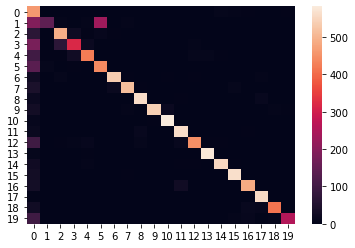

                          precision    recall  f1-score   support

             alt.atheism       0.29      0.96      0.45       480
           comp.graphics       0.91      0.24      0.39       584
 comp.os.ms-windows.misc       0.84      0.83      0.83       591
comp.sys.ibm.pc.hardware       0.85      0.54      0.66       590
   comp.sys.mac.hardware       0.90      0.73      0.80       578
          comp.windows.x       0.64      0.74      0.69       593
            misc.forsale       0.95      0.91      0.93       585
               rec.autos       0.96      0.87      0.91       594
         rec.motorcycles       0.95      0.94      0.95       598
      rec.sport.baseball       0.99      0.90      0.94       597
        rec.sport.hockey       0.97      0.97      0.97       600
               sci.crypt       0.92      0.94      0.93       595
         sci.electronics       0.95      0.75      0.84       591
                 sci.med       0.97      0.97      0.97       594
         

In [32]:
DEFAULT_CLASS=0
Y_pred2 = [np.argmax(x) if np.max(x) >= 0.5 else DEFAULT_CLASS for x in Y_pred]

#Y_pred2=np.argmax(Y_pred, axis=1)
#Y_test2=np.argmax(Y_test, axis=1)
Y_train2=np.argmax(Y_train,axis=1)
cm = confusion_matrix(Y_train2, Y_pred2)
#cm = confusion_matrix(Y_test2, Y_pred2)

sns.heatmap(cm)
plt.show()

print(classification_report(Y_train2,Y_pred2,target_names=label_names))
#print(classification_report(Y_test2,Y_pred2,target_names=label_names))

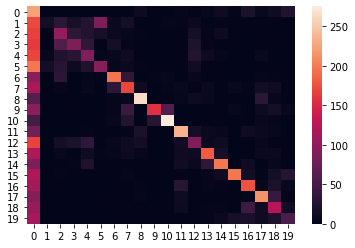

                          precision    recall  f1-score   support

             alt.atheism       0.09      0.70      0.16       319
           comp.graphics       0.33      0.03      0.06       389
 comp.os.ms-windows.misc       0.33      0.26      0.29       394
comp.sys.ibm.pc.hardware       0.42      0.22      0.29       392
   comp.sys.mac.hardware       0.32      0.23      0.27       385
          comp.windows.x       0.44      0.24      0.31       395
            misc.forsale       0.65      0.50      0.57       390
               rec.autos       0.48      0.43      0.45       396
         rec.motorcycles       0.77      0.67      0.72       398
      rec.sport.baseball       0.79      0.39      0.53       397
        rec.sport.hockey       0.78      0.69      0.73       399
               sci.crypt       0.67      0.59      0.63       396
         sci.electronics       0.40      0.23      0.29       393
                 sci.med       0.63      0.45      0.53       396
         

In [34]:
Y_pred=model.predict(X_test)

DEFAULT_CLASS=0
Y_pred2 = [np.argmax(x) if np.max(x) >= 0.5 else DEFAULT_CLASS for x in Y_pred]

Y_test2=np.argmax(Y_test, axis=1)
cm = confusion_matrix(Y_test2, Y_pred2)

sns.heatmap(cm)
plt.show()

print(classification_report(Y_test2,Y_pred2,target_names=label_names))
#print(classification_report(Y_test2,Y_pred2,target_names=label_names))